# Task 2 -- Diffusion Maps

### Imports

In [2]:
from DiffusionMap import DiffusionMap
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA

## Part one

### creation of t_k and x_k

In [2]:
t_k = np.zeros((1000,))
for i in range(1000):
    t_k[i] = (2 *math.pi * i)/ (1000+1)

x_k = np.zeros((1000,2))
for i in range(1000):
    x_k[i][0] = np.cos(t_k[i])
    x_k[i][1] = np.sin(t_k[i])
 
dfm = DiffusionMap(datapoints)
eigenvectors= dfm.get_eigenvectors(5)


### plotting the dataset and the five eigenvectors

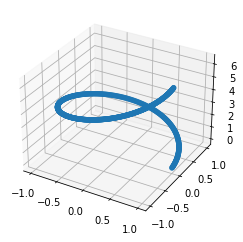

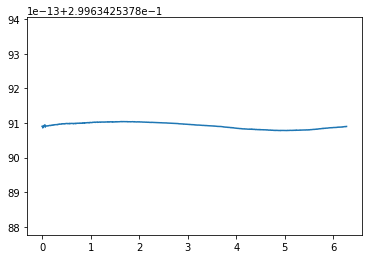

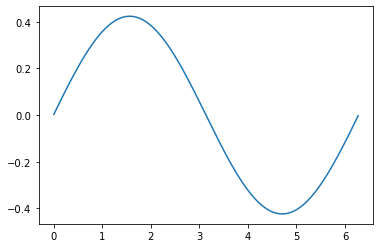

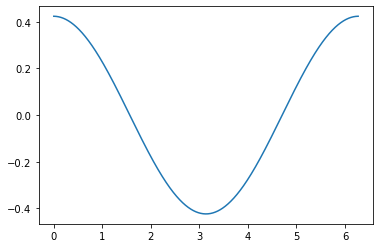

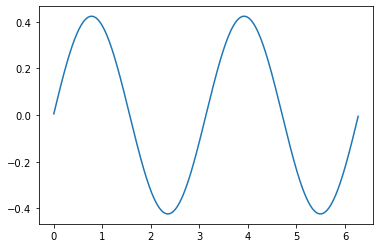

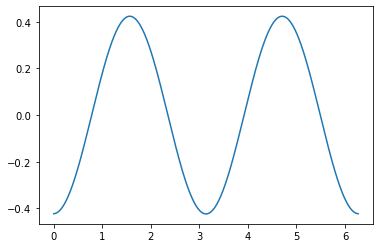

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(datapoints[:,0], datapoints[:,1],t_k)
plt.savefig("data_part_one")
plt.show()


for i in range(5):
    plt.plot(t_k, eigenvectors[:,i])
    #plt.savefig("eigenvector" + str(i))
    plt.show()
        

## Part two

### create the swiss role dataset and plot it


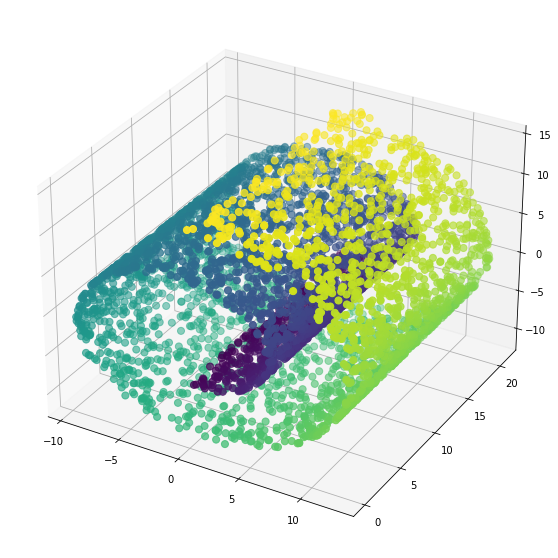

In [81]:
swiss_roll, sr_color = make_swiss_roll(5000)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(swiss_roll[:,0], swiss_roll[:,1], swiss_roll[:,2],c=sr_color,s=50)
plt.savefig("swiss_role_3d")
plt.show()

### create diffusion maps and compute eigenvectors.

In [82]:
dm = DiffusionMap(swiss_roll)
eigenvectors = dm.get_eigenvectors(10)

### plot results

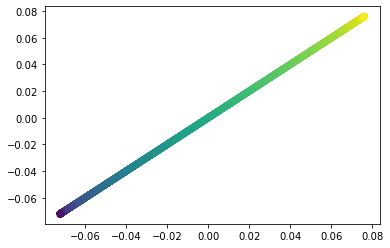

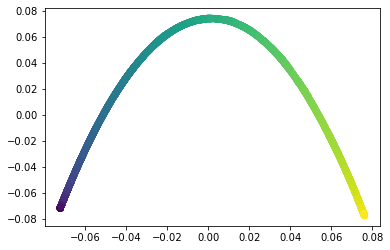

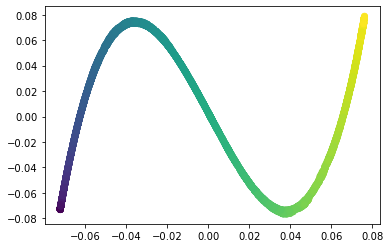

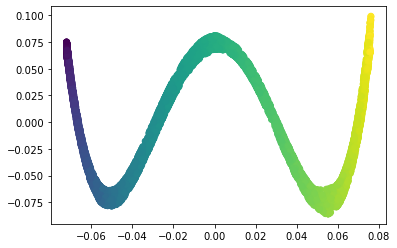

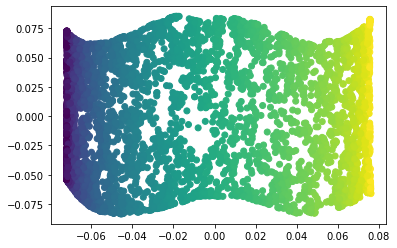

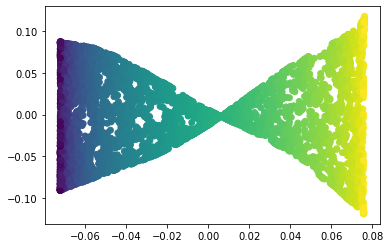

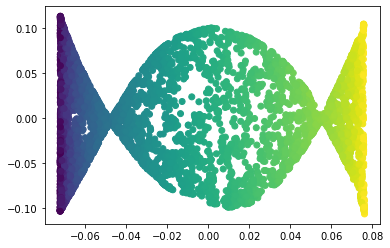

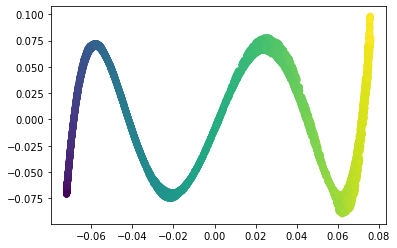

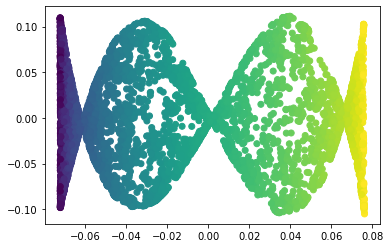

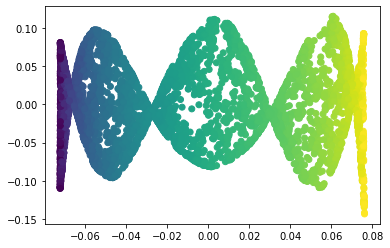

In [83]:
for i in range(1,11):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(eigenvectors[:,1], eigenvectors[:,i],c=sr_color)
    plt.savefig("eigenvector2-" + str(i))
    plt.show()

### only 1000 datapoints

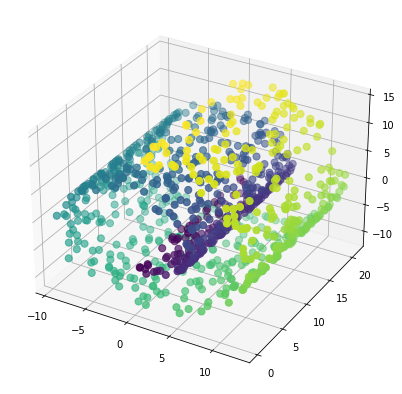

In [5]:
swiss_roll, sr_color = make_swiss_roll(1000)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
ax.scatter(swiss_roll[:,0], swiss_roll[:,1], swiss_roll[:,2],c=sr_color,s=50)
plt.savefig("swiss_role_3d_1000")
plt.show()

Compute PCA

In [32]:
swiss_roll, sr_color = make_swiss_roll(1000)
pca = PCA(n_components=3)
pca.fit(swiss_roll)
explained_variance_ratio_ = pca.explained_variance_ratio_
energies = np.zeros(3)
for i in range(1,4):
    energies[i-1] = np.sum(np.square(explained_variance_ratio_[:i])) / np.sum(np.square(explained_variance_ratio_))
print(energies)

[0.47464393 0.78272511 1.        ]


### plot the results of the swiss roll with only 1000 datapoints

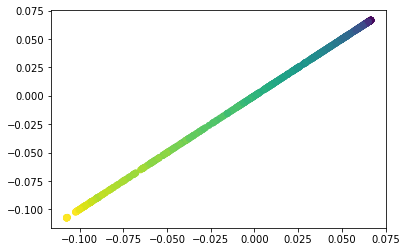

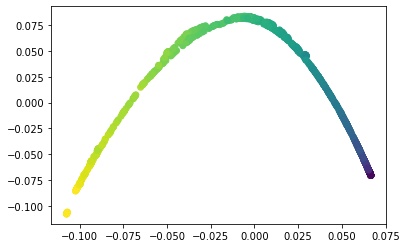

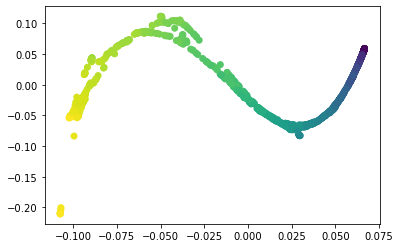

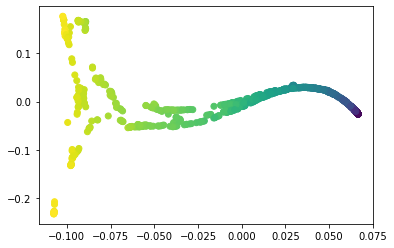

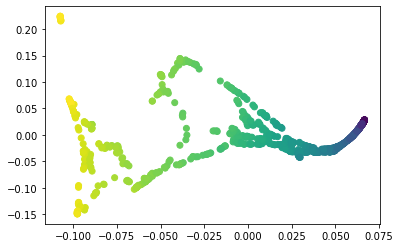

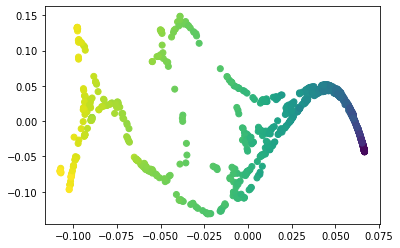

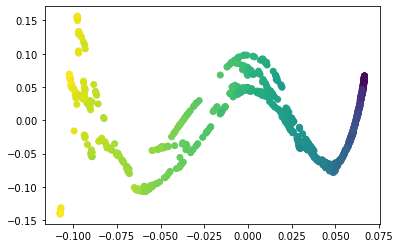

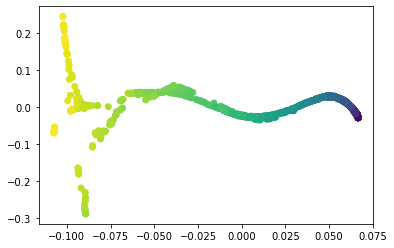

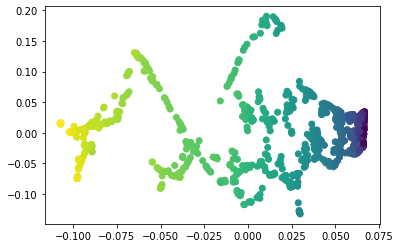

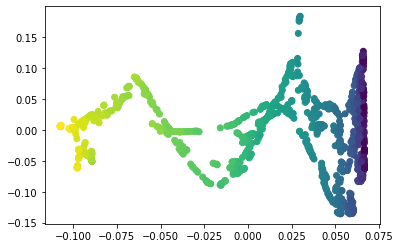

In [85]:
dm = DiffusionMap(swiss_roll)
eigenvectors = dm.get_eigenvectors(10)
for i in range(1,11):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(eigenvectors[:,1], eigenvectors[:,i],c=sr_color)
    plt.savefig("eigenvector-1000-2-" + str(i))
    plt.show()

## Part Three

### create the datamatrix out of the file 

In [ ]:
dataset = np.loadtxt("data_DMAP_PCA_vadere.txt", dtype='float', delimiter=' ')

(1000, 30)


### print the trajectorys of the first to pedestrians into a 2D-plot

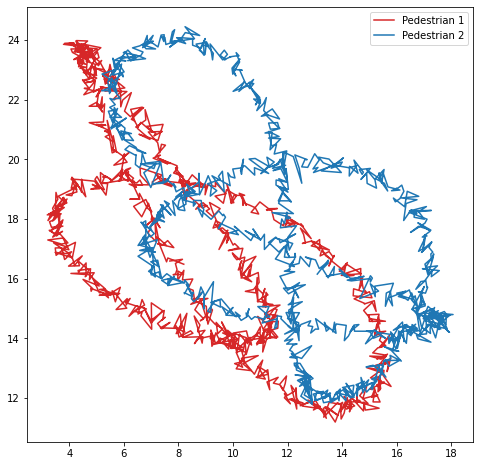

In [ ]:
traj_ped1 = dataset[:,:2]
traj_ped2 = dataset[:,2:4]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
plt.plot(traj_ped1[:, 0], traj_ped1[:, 1], label="Pedestrian 1", color='tab:red')
plt.plot(traj_ped2[:, 0], traj_ped2[:, 1], label="Pedestrian 2", color='tab:blue')
plt.legend()
plt.savefig("trajec_two_persons")
plt.show()

### compute and plot the first ten eigenvectors

In [123]:
difm = DiffusionMap(dataset)
eigenvectors = difm.get_eigenvectors(10)

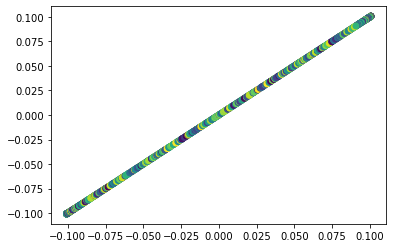

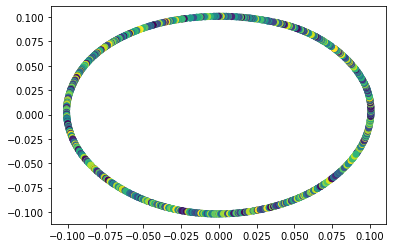

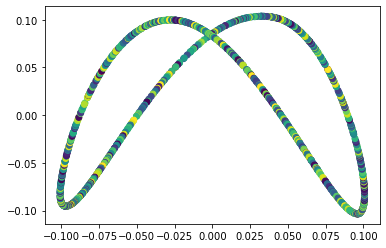

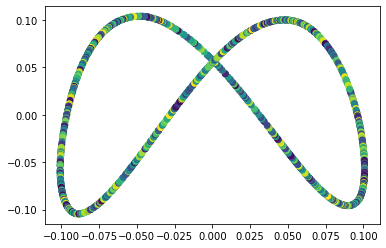

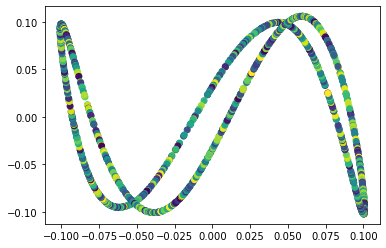

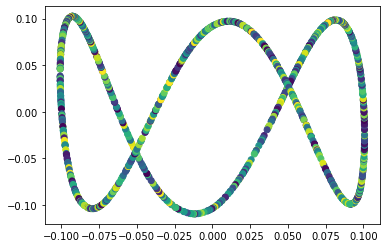

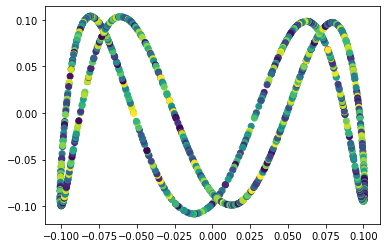

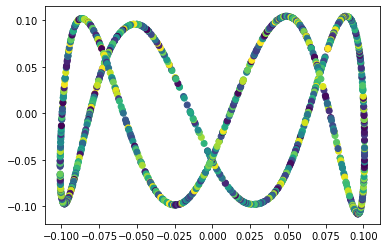

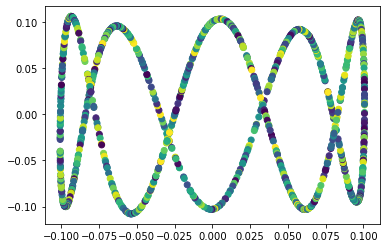

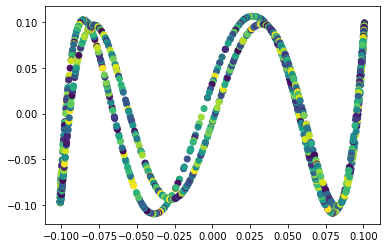

In [126]:
for i in range(1,11):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(eigenvectors[:,1], eigenvectors[:,i],c=sr_color)
    plt.savefig("eigenvector3-" + str(i))
    plt.show()

## BONUS


In [35]:
import datafold.dynfold as dfold
import datafold.pcfold as pfold
from datafold.dynfold import LocalRegressionSelection
from datafold.utils.plot import plot_pairwise_eigenvector

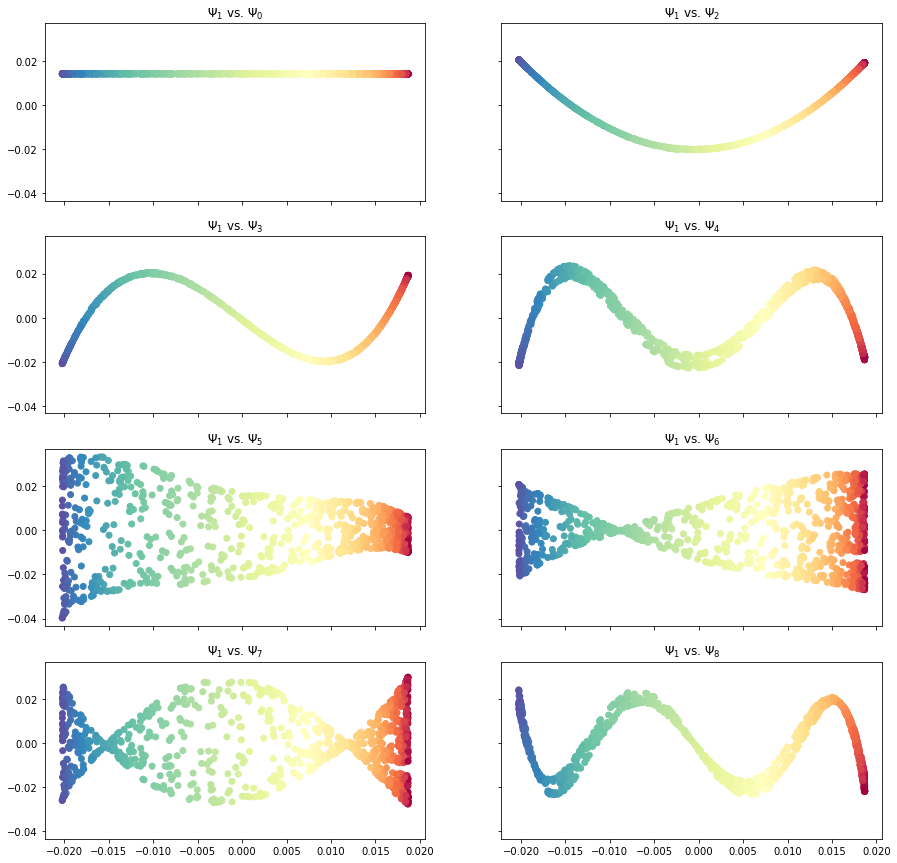

In [42]:
nr_samples = 5000
X, X_color = make_swiss_roll(nr_samples, random_state=0, noise=0)
# reduce number of points for plotting
nr_samples_plot = 1000
idx_plot = np.random.permutation(nr_samples)[0:nr_samples_plot]

X_pcm = pfold.PCManifold(X)
X_pcm.optimize_parameters()

dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
    n_eigenpairs=9,
    dist_kwargs=dict(cut_off=X_pcm.cut_off),
)
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

plot_pairwise_eigenvector(
    eigenvectors=dmap.eigenvectors_[idx_plot, :],
    n=1,
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(cmap=plt.cm.Spectral, c=X_color[idx_plot]),
)